**install if needed**

In [ ]:
!pip3 install sumy
!pip3 install rouge
!pip3 install xlsxwriter
!pip3 install xlrd
import nltk
nltk.download('punkt')

**import modules**

In [1]:
import pandas

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

from nltk.tokenize import sent_tokenize

import random

import numpy

from rouge import Rouge
rouge = Rouge()

import matplotlib.pyplot as plt


**Functions**

In [2]:
stemmer = Stemmer("english")
lsa_summarizer = LsaSummarizer(stemmer) #LSA summarizer
tr_summarizer = TextRankSummarizer(stemmer) #TEXTRANK summarizer

lsa_summarizer.stop_words=get_stop_words("english")
tr_summarizer.stop_words=get_stop_words("english")

#get summary via LSA
def get_summary_lsa(rawtext, num_of_sentences):
    sentences = num_of_sentences #target length

    parser = PlaintextParser.from_string(' '.join(sent_tokenize(rawtext)), Tokenizer("english"))

    text_list = []
    for sentence in lsa_summarizer(parser.document, sentences):
        text_list.append(str(sentence))
    txt =' '.join(text_list)

    return(txt)

#get summary via TR
def get_summary_textrank(rawtext, num_of_sentences):
    sentences = num_of_sentences #target length

    parser = PlaintextParser.from_string(' '.join(sent_tokenize(rawtext)), Tokenizer("english"))

    text_list = []
    for sentence in tr_summarizer(parser.document, sentences):
        text_list.append(str(sentence))
    txt =' '.join(text_list)

    return(txt)

#get summary via random
def get_summary_random(rawtext,target_num_of_sentences):
    sentences=sent_tokenize(rawtext)
    n_sentences=len(sentences)
    if target_num_of_sentences >= n_sentences:
        return(rawtext)
    random_sentences=random.sample(sentences,target_num_of_sentences)
    return(' '.join(random_sentences))

#get rouge2 f-score 
def get_rouge_2_f(text1,text2):
    scores = rouge.get_scores(text1, text2)
    score_f=scores[0]['rouge-2']['f']
    return(score_f)


def evaluate(intros,texts,summary_function,sent_n_values):
    
    rouge_2f_median_scores=[]
    rouge_2f_deviation_values=[]

    for sent_n in sent_n_values:
        print('Evaluating for', sent_n,'sentences...')
        
        rouge_2f_scores=[]
        i=0
        for name,intro,text in zip(names,intros,texts):
            #preprocess
            text=text.replace('\n',' ')
            intro=intro.replace('\n',' ')

            #get full text of article
            fulltext=intro+' '+text


            summary=summary_function(fulltext,sent_n)
            
            try:
                score_r2f=get_rouge_2_f(summary,fulltext)
                rouge_2f_scores.append(score_r2f)
            except:
                print('Error when parsing')
            
            i=i+1
            if i%500==0:
                print(round(i/len(texts)*100,2),'%  done')

        rouge_2f_median_scores.append(round(numpy.median(rouge_2f_scores),2))
        rouge_2f_deviation_values.append(round(numpy.std(rouge_2f_scores),2))
        
        print(rouge_2f_median_scores)
        print(rouge_2f_deviation_values)
        
    return rouge_2f_median_scores,rouge_2f_deviation_values

**get corpus from local file**

In [3]:
df = pandas.read_excel('wikigold.xlsx')
df

,0,1,2
0,Acra_(fortress),"The Acra (also spelled Akra, from Ancient Gree...",\n\nHistory\nBackground\nFollowing Alexander ...
1,Angkor_Wat,"Angkor Wat (; Khmer: អង្គរវត្ត, ""City/Capital ...","\n\nEtymology\nThe modern name, Angkor Wat (K..."
2,Anthony_Roll,The Anthony Roll is a paper record of ships of...,\n\nAuthor and artist\nAnthony Anthony has be...
3,Belton_House,Belton House is a Grade I listed country house...,"\n\nEarly history\nThe Brownlow family, a dyn..."
4,Benty_Grange_helmet,The Benty Grange helmet is a boar-crested Angl...,\n\nDescription\nThe Benty Grange helmet was ...
...,...,...,...
5823,John_Plagis,"Ioannis Agorastos ""John"" Plagis, DSO, DFC & Ba...",\n\nEarly life\nJohn Plagis was born on 10 Ma...
5824,Edwin_Taylor_Pollock,"Edwin Taylor Pollock (October 25, 1870 – June ...",\n\nEarly career\nOriginally from Mount Gilea...
5825,Lazare_Ponticelli,"Lazare Ponticelli (born Lazzaro Ponticelli, 24...",\n\nEarly life\nBorn as Lazzaro Ponticelli in...
5826,Arthur_W._Radford,Arthur William Radford (27 February 1896 – 17 ...,\n\nEarly life\nArthur William Radford was bo...


In [4]:
names=df[0].tolist()
intros=df[1].tolist()
texts=df[2].tolist()

Evaluate

In [5]:
sent_n_values=[1,5,10,15,20]

Already evaluated

In [7]:
#sent_n_values=[1,5,10]
#random_method_r2f=[0.01, 0.05, 0.11]
#random_method_deviation=[0.01, 0.04, 0.07]

#textrank_method_r2f=[0.03, 0.12,0.21]
#textrank_method_deviation=[0.02,0.06,0.09]

#lsa_method_r2f=[0.02, 0.1, 0.17]
#lsa_method_deviation=[0.01, 0.05, 0.08]

In [ ]:
random_method_r2f, random_method_deviation = evaluate(intros,texts,get_summary_random,[15])

Evaluating for 15 sentences...
8.58 %  done
17.16 %  done
25.74 %  done
34.32 %  done


In [ ]:
#textrank_method_r2f, textrank_method_deviation = evaluate(intros,texts,get_summary_textrank,sent_n_values)

In [ ]:
lsa_method_r2f, lsa_method_deviation = evaluate(intros,texts,get_summary_lsa,[15])

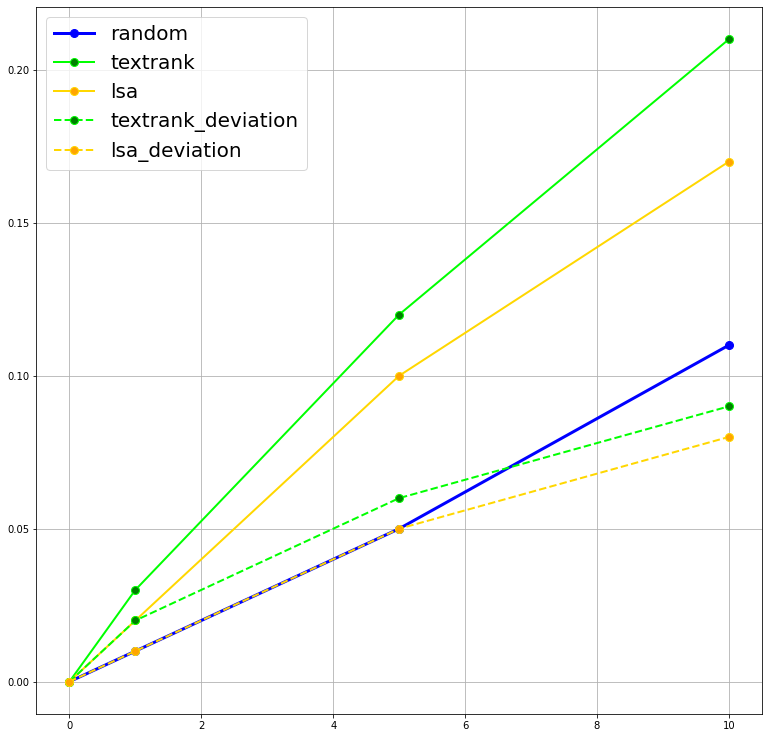

In [14]:
# Data
df=pandas.DataFrame({
    'N_sent': [0]+sent_n_values,
    'random': [0]+random_method_r2f, 'random_deviation': [0]+random_method_deviation,
    'textrank':[0]+textrank_method_r2f,'textrank_deviation':[0]+textrank_method_deviation ,
    'lsa':[0]+lsa_method_r2f ,'lsa_deviation': [0]+lsa_method_deviation
    })
 
plt.figure(figsize=(13,13)) 
# multiple line plot
plt.plot( 'N_sent', 'random', data=df, marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=3)
plt.plot( 'N_sent', 'textrank', data=df, marker='o',markerfacecolor='green', markersize=8, color='lime', linewidth=2)
plt.plot( 'N_sent', 'lsa', data=df, marker='o',markerfacecolor='orange', markersize=8, color='gold', linewidth=2)
#plt.plot( 'N_sent', 'random_deviation', data=df, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2, linestyle='dashed')
plt.plot( 'N_sent', 'textrank_deviation', data=df, marker='o',markerfacecolor='green', markersize=8, color='lime', linewidth=2,linestyle='dashed')
plt.plot( 'N_sent', 'lsa_deviation', data=df, marker='o',markerfacecolor='orange', markersize=8, color='gold', linewidth=2,linestyle='dashed')
plt.legend(prop={'size': 20})
plt.grid()
plt.show()